In [1]:
import numpy as np
import scipy.optimize
from py_vlasov.util import zp, kzkp, list_to_complex, real_imag
from py_vlasov.wrapper import oblique_wrapper
from py_vlasov.transport_ratios import input_gen, transport_ratios
from py_vlasov.follow_parameter import follow_k
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14


%matplotlib inline

In [2]:
def fast_freq(k, theta, betap):
    kz, kp = kzkp(k, theta)
    cos_theta = kz / k
    kdi = k / np.sqrt(betap)
    return kdi * np.sqrt(1 + kdi**2 * cos_theta**2)

def kdi_2_krhoi(kdi, betap):
    return kdi * np.sqrt(betap)

# single k

In [7]:
betap = .1
t_list=[1.,1]
a_list=[1., 1.]
n_list=[1.,1.] 
q_list=[1.,-1.]
m_list=[1., 1./1836.]
v_list=[0.,0.]
n = 5
theta = 20.

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

NameError: name 'n' is not defined

In [4]:
kdi = 30
k = kdi_2_krhoi(kdi, betap)
kz, kp = kzkp(k, theta)
fast = fast_freq(k, theta, betap)
print('guess fast mode freq = {0:.2f}'.format(fast))

f = lambda wrel:\
    real_imag(oblique_wrapper(list_to_complex(wrel), kz, kp, betap,
                              t_list, a_list, n_list, q_list, \
                              m_list, v_list, method = 'numpy', n = 10, \
                              aol=1e-4))
# guess = 1.55 - 0.01j
guess = fast
wr, wi = scipy.optimize.fsolve(f, real_imag(guess))

print(wr)
print(wi)

guess fast mode freq = 846.26
556.142177385
-4.46095472232


In [ ]:
inp = input_gen(list_to_complex([wr, wi]), kp, kz, betap)

tr = transport_ratios(inp, print_result = True);

In [ ]:
tr['eigen_e']

# Follow $k$

In [3]:
betap = 1.
t_list=[1.,1]
a_list=[1., 1.]
n_list=[1.,1.] 
q_list=[1.,-1.]
m_list=[1., 1./1836.]
v_list=[0.,0.]
n = 6
aol = 1e-4
method = 'pade'

theta = 30.

kdi = 1
k = kdi_2_krhoi(kdi, betap)
kz, kp = kzkp(k, theta)

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

In [4]:
target_kdi = 10
target_k = kdi_2_krhoi(target_kdi, betap)
print('target_k = {0:.2f}'.format(target_k))
print('target_kde = {0:.3g}'.format(target_kdi / np.sqrt(1836.)))

seed_freq = fast_freq(k, theta, betap)

freq = follow_k(seed_freq, target_k, param,
                log_incrmt = 0.1, incrmt_method = 'log')

target_k = 10.00
target_kde = 0.233


In [5]:
freq

((82.400603190721995-3.8371037753709594j),
 (8.6602540378443873,
  4.9999999999999991,
  1.0,
  [1.0, 1],
  [1.0, 1.0],
  [1.0, 1.0],
  [1.0, -1.0],
  [1.0, 0.0005446623093681918],
  [0.0, 0.0],
  6,
  'pade',
  0.0001),
 [(1.6095996855849302-0.065893751461712863j),
  (1.8321323770554709-0.065720706443916713j),
  (2.0913941565438856-0.064580451249690182j),
  (2.3946694441022753-0.062519453182165258j),
  (2.7509845224113207-0.059779641361027133j),
  (3.1715351825760045-0.056872287173225178j),
  (3.6702065923530989-0.054642401305192392j),
  (4.2641996550094499-0.054291827790677073j),
  (4.9747538477405779-0.057328249379190593j),
  (5.8279288027121723-0.065432544248710978j),
  (6.8553964368407234-0.080293275210069626j),
  (8.0952381435586087-0.10352728195578768j),
  (9.5928541303381891-0.13682383068418266j),
  (11.402194464968183-0.18233510022079494j),
  (13.587452028623796-0.24315837449757716j),
  (16.225157267510795-0.32373994941002365j),
  (19.406526250039533-0.43017868890089989j),
  (

# Parameter conversion

$$\frac{c}{v_A} = \sqrt{\frac{m_p}{m_e}} \frac{\omega_{pe}}{\omega_{ce}}$$
$$\beta_p = \frac{v_{Tp}^2}{v_A^2} = \frac{m_e}{m_p} \frac{T_p}{T_e} \frac{v_{Te, h}^2}{v_A^2}$$

Given that $$v_{Te, h} = 0.6 c \omega_{ce} \cos\theta / \omega_{pe}$$

$$\beta_p = \frac{T_p}{T_e} 0.36 \cos{\theta}^2$$

In [6]:
theta = 30
wpe_wce = 4
the_tp = 1
fac = 0.6
# ===============

aol = 1/np.sqrt(1836)/wpe_wce
betap = 1/the_tp * np.cos(np.deg2rad(theta))**2 * fac**2

print('aol = {0:.4g}'.format(aol))
print('beta_p = {0:.4g}'.format(betap))

aol = 0.005835
beta_p = 0.27


In [37]:
tc_th = .001

t_list=[1., the_tp, the_tp * tc_th]
a_list=[1., 1., 1.]
n_list=[1.,.2,.8] 
q_list=[1.,-1., -1.]
m_list=[1., 1./1836., 1./1836]
v_list=[0.,0.,0.]
n = 6
method = 'pade'

kdi = 1

target_kde = 3
target_kdi = target_kde * np.sqrt(1836)

k = kdi_2_krhoi(kdi, betap)
kz, kp = kzkp(k, theta)

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

In [38]:
target_k = kdi_2_krhoi(target_kdi, betap)
print('target_k = {0:.2f}'.format(target_k))
print('target_kde = {0:.3g}'.format(target_kdi / np.sqrt(1836.)))

seed_freq = fast_freq(k, theta, betap)
print('seed_freq = {0:.3g}'.format(seed_freq))
freq = follow_k(seed_freq, target_k, param,
                log_incrmt = 0.02, incrmt_method = 'log')

target_k = 66.79
target_kde = 3
seed_freq = 1.32


In [39]:
freq_arr = np.array(freq[-1])
print(freq_arr[::5])

[    1.49122893 -3.42724273e-03j     1.71573873 -3.09710221e-03j
     1.98075832 -2.96586516e-03j     2.29525811 -3.04718338e-03j
     2.66986623 -3.13963375e-03j     3.11751499 -3.36435166e-03j
     3.65436459 -3.91292768e-03j     4.30021154 -4.81873800e-03j
     5.07913966 -6.10459709e-03j     6.02047611 -7.82881091e-03j
     7.15988850 -1.00946261e-02j     8.54069084 -1.30543785e-02j
    10.21538566 -1.69085383e-02j    12.24748676 -2.19085568e-02j
    14.71366692 -2.83612518e-02j    17.70626595 -3.66300737e-02j
    21.33618203 -4.71285040e-02j    25.73614800 -6.02996819e-02j
    31.06435748 -7.65748586e-02j    37.50834603 -9.63031521e-02j
    45.28894316 -1.19649363e-01j    54.66398763 -1.46470676e-01j
    65.93134508 -1.76214949e-01j    79.43059970 -2.07941075e-01j
    95.54263087 -2.40644166e-01j   114.68614199 -2.74144516e-01j
   137.31006448 -3.10788458e-01j   163.88057109 -3.57992253e-01j
   194.86112971 -4.31176678e-01j   230.68349504 -5.56033821e-01j
   271.70649202 -7.686874

In [40]:
kde_start = kdi / np.sqrt(1836)
kde_end = np.sqrt(freq[1][0]**2 + freq[1][1]**2) /np.sqrt(1836) / np.sqrt(betap)

In [41]:
kde_list = np.logspace(np.log10(kde_start), np.log10(kde_end), len(freq_arr))

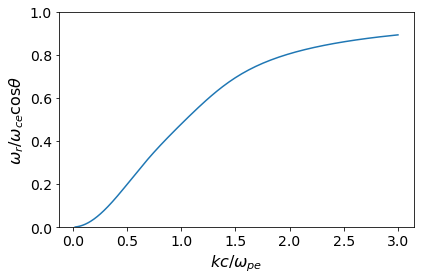

In [42]:
plt.plot(kde_list, freq_arr.real/1836/np.cos(np.deg2rad(theta)))
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel(r'$\omega_r/\omega_{ce} \cos \theta $')
plt.ylim([0, 1])
plt.tight_layout()
# plt.savefig('whistler_dispersion_real_1.png')

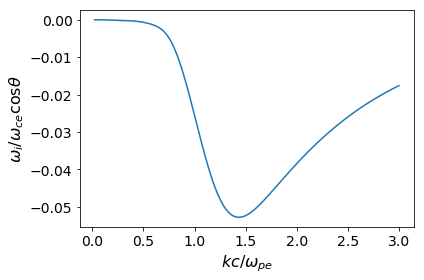

In [43]:
plt.plot(kde_list, freq_arr.imag/1836/np.cos(np.deg2rad(theta)))
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.tight_layout()
# plt.savefig('whistler_dispersion_imag_1.png')

# Transport ratios

In [34]:
k_end = np.sqrt(freq[1][0]**2 + freq[1][1]**2)
k_start = kdi_2_krhoi(kdi, betap)
k_list = np.logspace(np.log10(k_start), np.log10(k_end), len(freq_arr))

ey_ez_list = []

for i in range(len(k_list)):
    freq_i = freq_arr[i]
    kz, kp = kzkp(k_list[i], theta)
    inp = input_gen(freq_i, kp, kz, betap)
    tr = transport_ratios(inp, print_result = False)
    eigen_e = tr['eigen_e']
    kvec = np.array([kp, 0, kz])
    khead = kvec/np.linalg.norm(k)
    ez_prime = np.dot(eigen_e, khead)
    ey_prime = eigen_e - ez_prime
    ey_ez = np.linalg.norm(ey_prime) / ez_prime.real
    ey_ez_list.append(ey_ez)
        

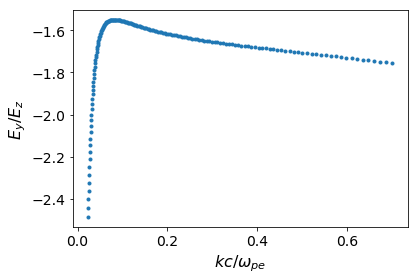

In [35]:
plt.plot(kde_list, ey_ez_list, '.')
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel('$E_y/E_z$')


In [36]:
ey_prime

array([ 20.29923248+5.96527683j,  21.56048249+5.01407063j,
        21.45863614+5.81071375j])